# **Project Title:** House Price Prediction for Properties in Major Cities of Pakistan


`Dataset`: [Pakistan House Price Dataset](https://www.kaggle.com/datasets/jillanisofttech/pakistan-house-price-dataset/data)  


# **About Dataset**
## Context
The dataset is scraped from zameen.com which is Pakistan's top real estate platform. It contains listings of properties from five major cities of Pakistan.  
The aim of this project is to perform Exploratory Data Analysis (EDA) to uncover insights and use Machine Learning models to predict property price based on the given attributes.  

### **Content**
#### Column Descriptions:
`property_id`: Unique identifier for each property.  
`location_id`: Unique identifier for each location within a city.  
`page_url`: The URL of the webpage where the property was published.  
`property_type`: Categorization of the property into six types: House, FarmHouse, Upper Portion, Lower Portion, Flat, or Room.  
`price`: The price of the property, which is the dependent feature in this dataset.  
`city`: The city where the property is located. The dataset includes five cities: Lahore, Karachi, Faisalabad, Rawalpindi, and Islamabad.  
`province`: The state or province where the city is located.  
`location`: Different types of locations within each city.  
`latitude` and `longitude`: Geographic coordinates of the cities.  




---

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')


### Load and Explore Dataset

In [2]:
df = pd.read_csv('zameen_property.csv')
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

In [4]:
df.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms,Area Size
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,5.892188
std,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,5.778327
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,3.000000
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,5.000000
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,8.000000
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,800.000000


---

### Data Cleaning / Preprocessing

In [5]:
#check for null values
df.isnull().sum().sort_values(ascending=False)

,0
agent,44072
agency,44071
property_id,0
location_id,0
property_type,0
page_url,0
price,0
location,0
latitude,0
longitude,0


In [6]:
# 'agent' and 'agency' columns are not significant for our analysis, so we can drop them
# df = df.drop(['agent', 'agency'], axis=1)

df.drop([
    'property_id', 'location_id', 'agency', 'agent',
    'area', 'Area Category' , 'latitude', 'longitude',
    'location'
], axis=1, inplace=True)

## Remove data ambiguities

In [7]:
df['property_type'].value_counts()

,count
property_type,
House,105468
Flat,38238
Upper Portion,13774
Lower Portion,9229
Room,685
Farm House,657
Penthouse,395


In [8]:
# Invalid scrap data
df[df['price'] < 10]
df = df[df['price'] >= 10].copy()

In [9]:
# Being sell abnormally (scarp issue)

mask = df['property_type'].isin(['Farm House', 'Penthouse'])
mask_df = df[mask].copy()
other_df = df[~mask].copy()

other_clean = other_df.groupby( ['city', 'property_type'], group_keys=False ).apply(
    lambda group: group[group['price'] >= group['price'].quantile(0.05)]
)
df = pd.concat([mask_df, other_clean], ignore_index=True).copy()

In [ ]:
q_10 = df['price'].quantile(0.1)
exp_props = df['property_type'].isin(['Farm House', 'Penthouse'])

# If no bedrooms in Luxury Houses so drop ELSE
# Lower prices houses could be single-portion/kitchen based.
# Also no-bath one with more bedroom shouldn't be for Rent. But can Sale as land.
filter = ~( ( ( df['bedrooms'] == 0 ) & exp_props ) |
               ( ( df['bedrooms'] == 0 ) & ( df['price'] > q_10 ) & ~exp_props ) |
               ( ( df['baths'] == 0 ) & ( df['bedrooms'] >= 3 ) ) & ( df['purpose'] == 'For Rent')
            )

df = df[filter].copy()
sorted_group = ( df.groupby('property_type', group_keys=False)
    .apply(lambda x: x.sort_values('price', ascending=False)).reset_index(drop=True) )
sorted_group


,page_url,property_type,price,city,province_name,baths,purpose,bedrooms,date_added,Area Type,Area Size
0,https://www.zameen.com/Property/islamabad_bhar...,Farm House,500000000,Islamabad,Islamabad Capital,2,For Sale,4,12-06-2018,Kanal,20.0
1,https://www.zameen.com/Property/islamabad_isla...,Farm House,360000000,Islamabad,Islamabad Capital,10,For Sale,11,06-28-2019,Kanal,50.0
2,https://www.zameen.com/Property/islamabad_tuma...,Farm House,300000000,Islamabad,Islamabad Capital,5,For Sale,3,03-06-2019,Kanal,168.0
3,https://www.zameen.com/Property/islamabad_chir...,Farm House,300000000,Islamabad,Islamabad Capital,5,For Sale,3,03-06-2019,Kanal,168.0
4,https://www.zameen.com/Property/islamabad_chak...,Farm House,270000000,Islamabad,Islamabad Capital,6,For Sale,7,11-06-2018,Kanal,72.0
...,...,...,...,...,...,...,...,...,...,...,...
140086,https://www.zameen.com/Property/faisalabad_sat...,Upper Portion,10000,Faisalabad,Punjab,0,For Rent,0,06-25-2019,Marla,3.0
140087,https://www.zameen.com/Property/faisalabad_sar...,Upper Portion,10000,Faisalabad,Punjab,1,For Rent,2,01-18-2019,Marla,3.0
140088,https://www.zameen.com/Property/faisalabad_man...,Upper Portion,10000,Faisalabad,Punjab,1,For Rent,2,12-19-2018,Marla,3.0
140089,https://www.zameen.com/Property/faisalabad_sam...,Upper Portion,10000,Faisalabad,Punjab,2,For Rent,2,07-17-2019,Marla,3.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140091 entries, 0 to 160464
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   page_url       140091 non-null  object 
 1   property_type  140091 non-null  object 
 2   price          140091 non-null  int64  
 3   city           140091 non-null  object 
 4   province_name  140091 non-null  object 
 5   baths          140091 non-null  int64  
 6   purpose        140091 non-null  object 
 7   bedrooms       140091 non-null  int64  
 8   date_added     140091 non-null  object 
 9   Area Type      140091 non-null  object 
 10  Area Size      140091 non-null  float64
dtypes: float64(1), int64(3), object(7)
memory usage: 12.8+ MB


In [12]:
#checking duplicates
df.duplicated().sum()

np.int64(0)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
#convertin 'date_added' to date format
df['date_added'] = pd.to_datetime(df['date_added'])

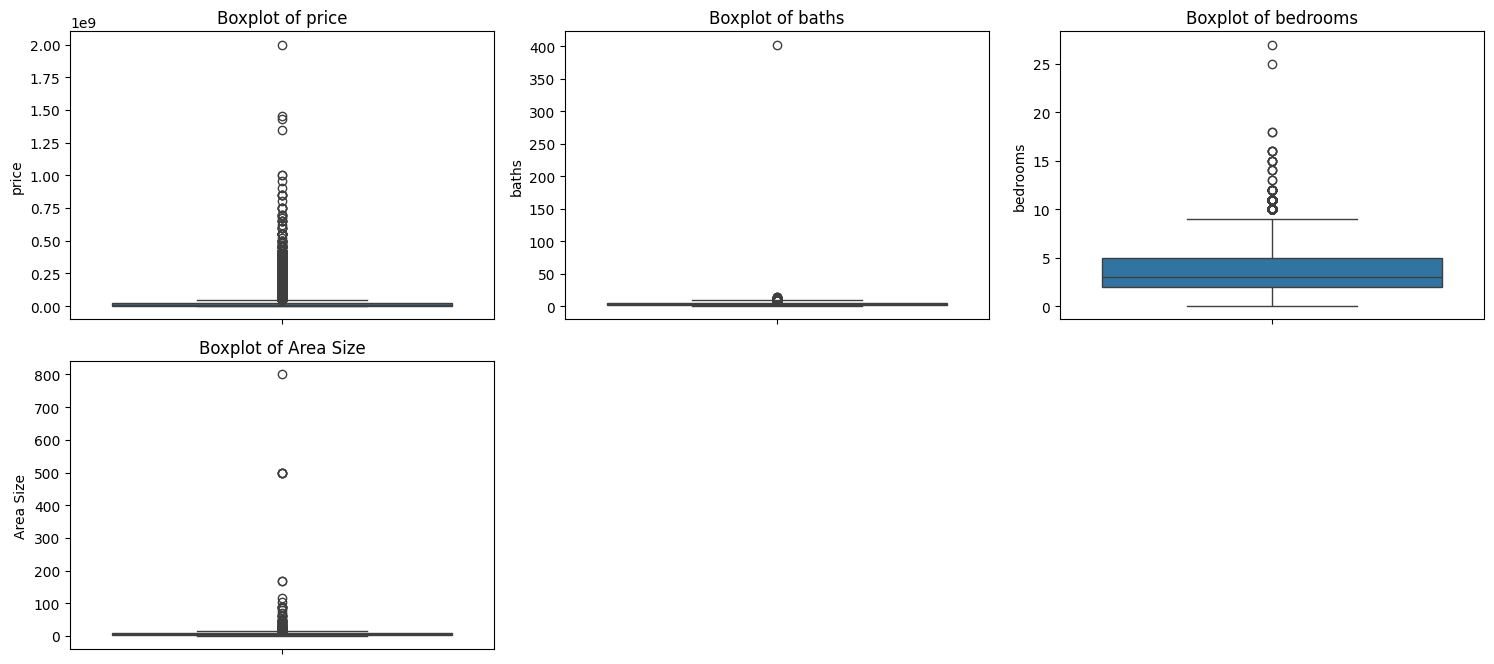

In [15]:
# checking for outliers
# ( Did here instead of directly scaling as feature-engs were giving extremas )
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

### **Feature Engineering**

In [16]:
#creating new feature for area size in square feet
df['area_sqft'] = np.where(
    df['Area Type'] == 'Marla', df['Area Size'] * 272.25,
    np.where(df['Area Type'] == 'Kanal', df['Area Size'] * 5445, df['Area Size'])
)

df['area_sqft'].describe()

,area_sqft
count,1.400910e+05
mean,3.113720e+03
std,2.003489e+04
min,0.000000e+00
25%,1.361250e+03
50%,2.069100e+03
75%,3.267000e+03
max,4.356000e+06


In [17]:
# Identifying outliers using IQR method
for col in ['Area Size', 'price', 'baths', 'bedrooms', 'area_sqft']:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f'{col}: {len(outliers)} outliers')


Area Size: 1041 outliers
price: 10979 outliers
baths: 871 outliers
bedrooms: 1032 outliers
area_sqft: 7461 outliers


##### Point to note:  
The dataset contains outliers.

In [18]:
# # removing outliers ( More aggressive towards right-extremas )
# for col in ['Area Size', 'price', 'baths', 'bedrooms']:
#     Q1, Q3 = df[col].quantile([0.25, 0.75])
#     IQR = Q3 - Q1
#     lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
#     df = df[(df[col] >= lower) & (df[col] <= upper)]


def remove_outliers(df, col, lower_p=0.005, upper_p=0.995):
    lower = df[col].quantile(lower_p)
    upper = df[col].quantile(upper_p)
    return df[(df[col] >= lower) & (df[col] <= upper)]

cols_to_clean = ['price', 'area_sqft']
cleaned_dfs = []
for city, group in df.groupby('city'):
    cleaned = group.copy()
    for col in cols_to_clean:
        if col in cleaned.columns:
            cleaned = remove_outliers(cleaned, col, 0.005, 0.995)
    cleaned_dfs.append(cleaned)

df = pd.concat(cleaned_dfs, ignore_index=True)
print(f"After Outliers removal: {len(df):,} rows")

After Outliers removal: 137,675 rows


In [19]:
df['area_sqft'].describe()

,area_sqft
count,137675.000000
mean,2716.194399
std,2199.515286
min,217.800000
25%,1361.250000
50%,2069.100000
75%,3267.000000
max,23958.000000


In [20]:
# Model was overfitting due to simple-formula So do all this only for train.
# df['price_per_sqft'] = df['price'] / df['area_sqft']

# adding column for year
df['year_added'] = df['date_added'].dt.year

### **Exploratory Data Analysis**

In [21]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categoric_cols = df.select_dtypes(include=['object']).columns.tolist()

In [22]:
df['purpose'].value_counts()

,count
purpose,
For Sale,103949
For Rent,33726


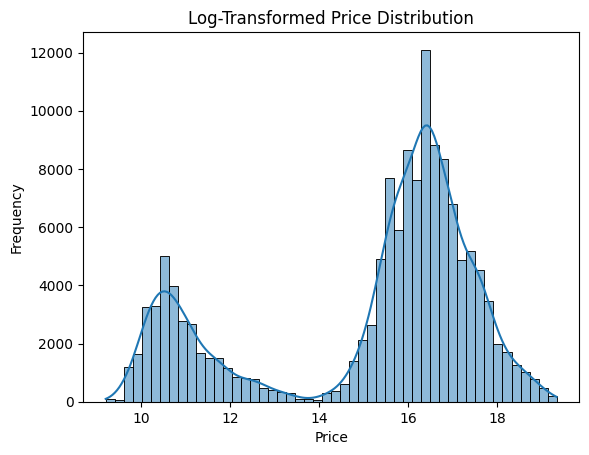

In [23]:
# price distribution for properties on sale
# sns.histplot(data=df[df['purpose'] == 'For Sale'], x='price',bins=100, kde=True)
# plt.title('Price Distribution for Sale Properties')
# plt.xlabel('Price (in crores)')

sns.histplot(np.log1p(df['price']), bins=50, kde=True)
plt.title('Log-Transformed Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

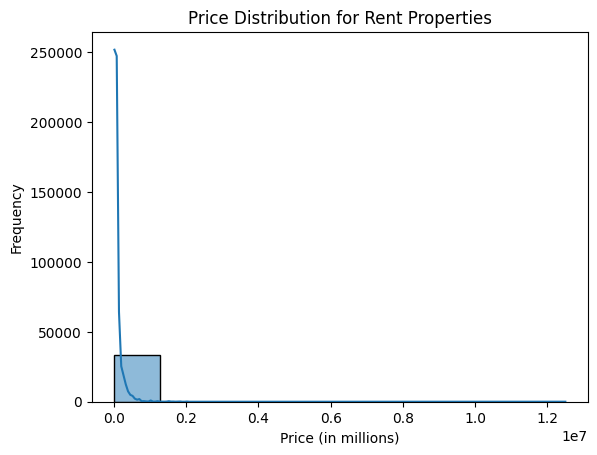

In [24]:
# price distribution for properties on sale
sns.histplot(data=df[df['purpose'] == 'For Rent'], x='price',bins=10, kde=True)
plt.title('Price Distribution for Rent Properties')
plt.xlabel('Price (in millions)')
plt.ylabel('Frequency')
plt.show()

In [25]:
df['Area Type'].value_counts()

,count
Area Type,
Marla,113248
Kanal,24427


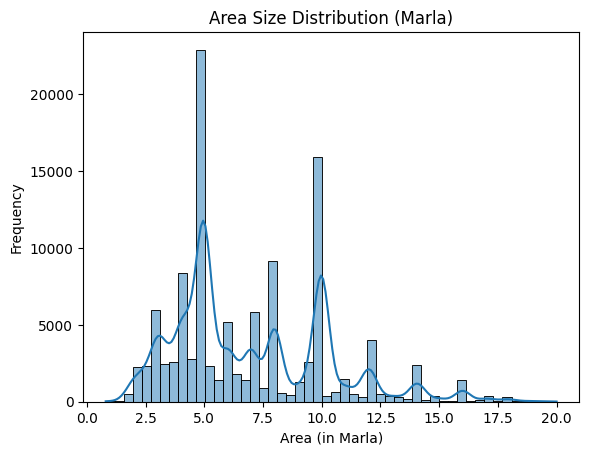

In [27]:
# Area Size distribution for Area Type 'Marla'
sns.histplot(data=df[df['Area Type'] == 'Marla'], x='Area Size',bins=50, kde=True)
plt.title('Area Size Distribution (Marla)')
plt.xlabel('Area (in Marla)')
plt.ylabel('Frequency')
plt.show()

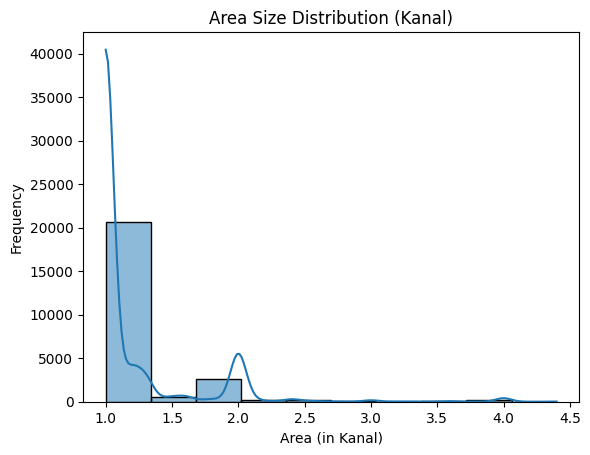

In [28]:
# Area Size distribution for Area Type 'Kanal'
sns.histplot(data=df[df['Area Type'] == 'Kanal'], x='Area Size',bins=10, kde=True)
plt.title('Area Size Distribution (Kanal)')
plt.xlabel('Area (in Kanal)')
plt.ylabel('Frequency')
plt.show()

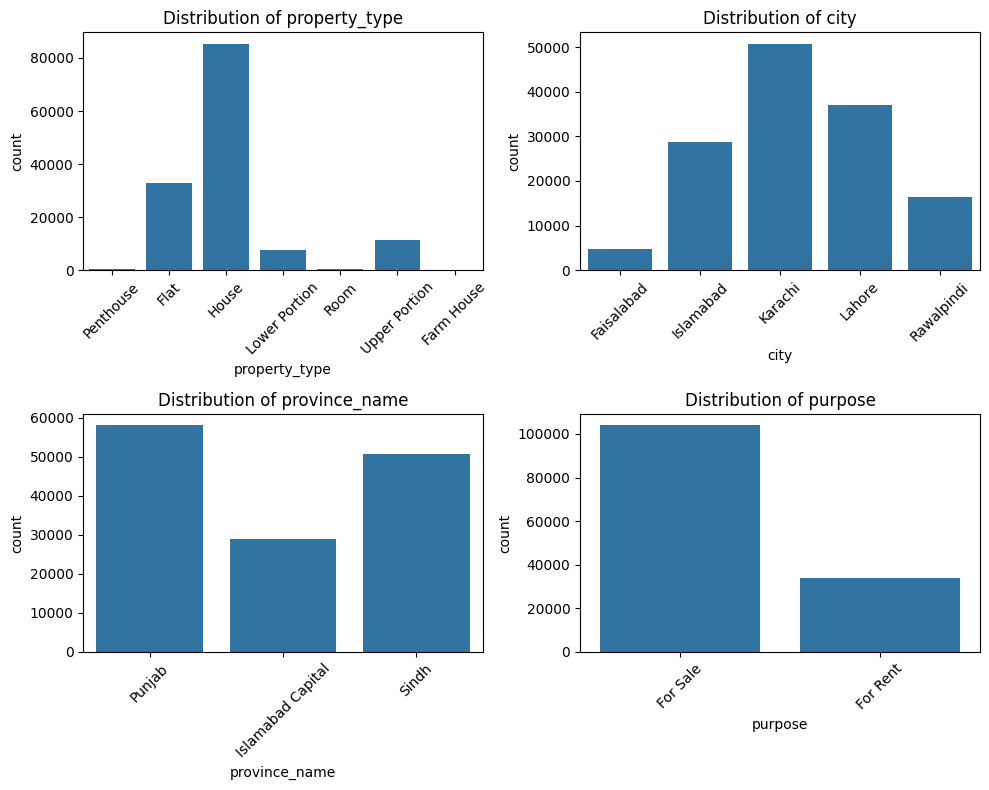

In [29]:
# categorical feature distributions
n_cols = 2
n_rows= 2
fig, axes = plt.subplots(n_cols, n_rows,figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()
for i, col in enumerate(['property_type', 'city', 'province_name', 'purpose']):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

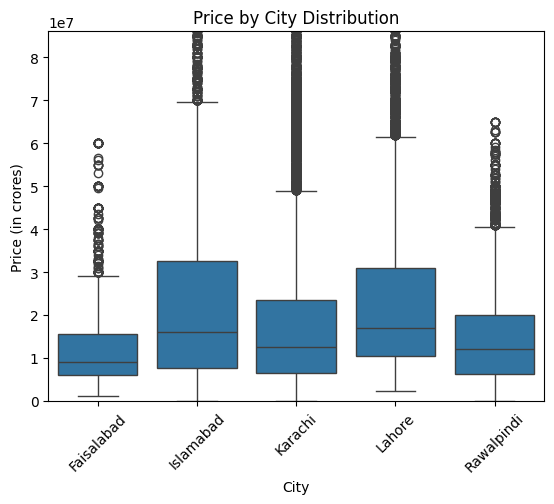

In [30]:
# price(For Sale) by city distribution
sns.boxplot(x='city', y='price', data=df[df['purpose'] == 'For Sale'])
plt.title('Price by City Distribution')
plt.xlabel('City')
plt.ylabel('Price (in crores)')
plt.xticks(rotation=45)
plt.ylim(0, df['price'].quantile(0.97))
plt.show()

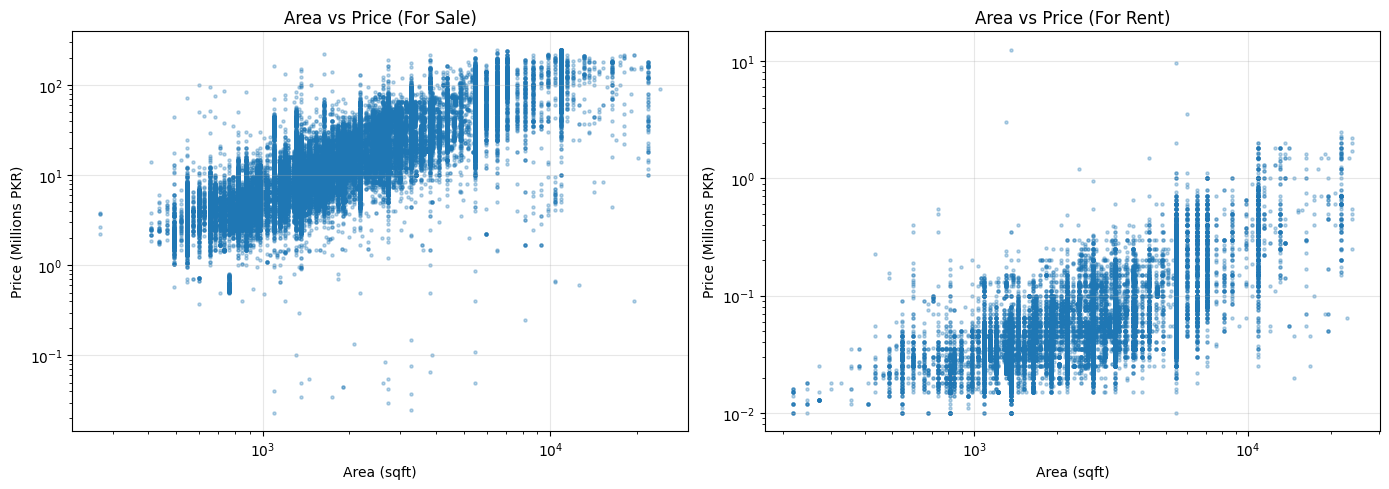

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
for i, purpose in enumerate(['For Sale', 'For Rent']):
    subset = df[df['purpose'] == purpose]
    axes[i].scatter(subset['area_sqft'], subset['price']/1e6, alpha=0.3, s=5)
    axes[i].set_xlabel('Area (sqft)')
    axes[i].set_ylabel('Price (Millions PKR)')
    axes[i].set_title(f'Area vs Price ({purpose})')
    axes[i].set_xscale('log')
    axes[i].set_yscale('log')
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# # checking price per sqft distribution using boxplot
# sns.boxplot(y=df['price_per_sqft'])
# plt.title('Price per Sqft Distribution')

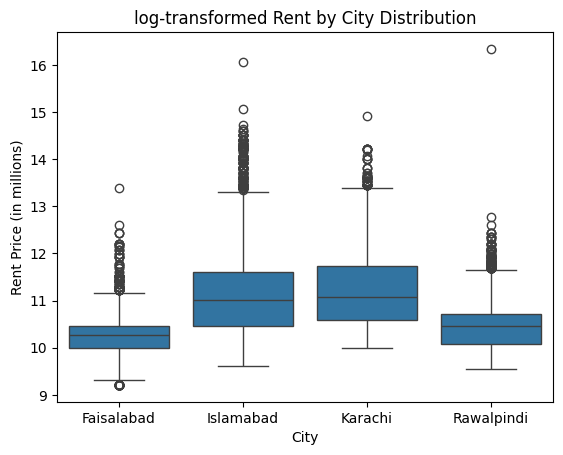

In [32]:
# price(For Rent) by city distribution
sns.boxplot(x='city', y=np.log1p(df['price']), data=df[df['purpose'] == 'For Rent'])
plt.title('log-transformed Rent by City Distribution')
plt.xlabel('City')
plt.ylabel('Rent Price (in millions)')
# plt.ylabel('Rent Price (in millions)')

plt.show()

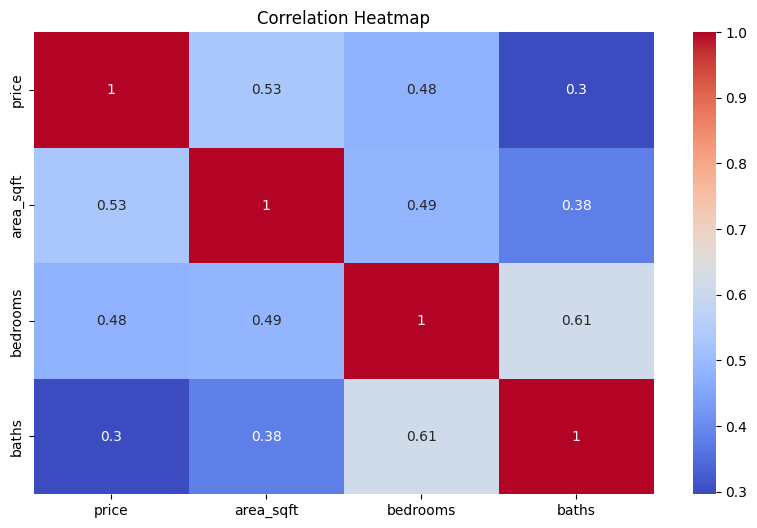

In [33]:
# correlation heatmap
# sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
corr_cols = ['price', 'area_sqft', 'bedrooms', 'baths']

plt.figure(figsize=(10, 6))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

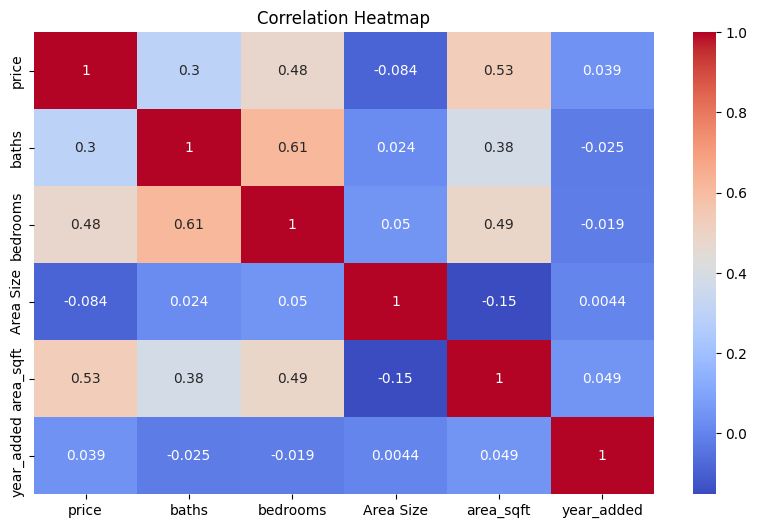

In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['int','float']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [35]:
df.head()

,page_url,property_type,price,city,province_name,baths,purpose,bedrooms,date_added,Area Type,Area Size,area_sqft,year_added
0,https://www.zameen.com/Property/faisalabad_can...,Penthouse,6372000,Faisalabad,Punjab,2,For Sale,2,2018-11-19,Marla,3.1,843.975,2018
1,https://www.zameen.com/Property/faisalabad_ill...,Penthouse,2500000,Faisalabad,Punjab,1,For Sale,1,2018-11-19,Marla,2.5,680.625,2018
2,https://www.zameen.com/Property/faisalabad_jin...,Flat,25000,Faisalabad,Punjab,3,For Rent,3,2019-07-17,Marla,4.0,1089.000,2019
3,https://www.zameen.com/Property/faisalabad_rac...,Flat,16000,Faisalabad,Punjab,0,For Rent,0,2019-07-17,Marla,5.0,1361.250,2019
4,https://www.zameen.com/Property/faisalabad_jha...,Flat,12000,Faisalabad,Punjab,2,For Rent,2,2019-07-17,Marla,3.0,816.750,2019


In [36]:
#dropping unnecessary columns
df = df.drop(['Area Size', 'Area Type', 'date_added'], axis=1)

In [37]:
df.to_csv('cleaned_data.csv', index=False)
# For Streamlit Thing
df = df.sort_values('price')
df.to_csv('sorted_cleaned_data.csv', index=False)

import sys
if 'google.colab' in sys.modules:
    from google.colab import files
    files.download('cleaned_data.csv')
    files.download('sorted_cleaned_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>